<a href="https://colab.research.google.com/github/amritatiwari789/foodwaste_management/blob/main/foodwaste_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()


Saving claims_data.csv to claims_data.csv
Saving food_listings_data.csv to food_listings_data.csv
Saving providers_data.csv to providers_data.csv
Saving receivers_data.csv to receivers_data.csv


In [5]:
import pandas as pd

claims = pd.read_csv("claims_data.csv")
food_listings = pd.read_csv("food_listings_data.csv")
providers = pd.read_csv("providers_data.csv")
receivers = pd.read_csv("receivers_data.csv")

# Quick check: show first 5 rows from each dataset
print("Providers:\n", providers.head(), "\n")
print("Receivers:\n", receivers.head(), "\n")
print("Food Listings:\n", food_listings.head(), "\n")
print("Claims:\n", claims.head(), "\n")


Providers:
    Provider_ID                         Name           Type  \
0            1             Gonzales-Cochran    Supermarket   
1            2  Nielsen, Johnson and Fuller  Grocery Store   
2            3                 Miller-Black    Supermarket   
3            4   Clark, Prince and Williams  Grocery Store   
4            5               Coleman-Farley  Grocery Store   

                                             Address            City  \
0  74347 Christopher Extensions\nAndreamouth, OK ...     New Jessica   
1           91228 Hanson Stream\nWelchtown, OR 27136     East Sheena   
2  561 Martinez Point Suite 507\nGuzmanchester, W...  Lake Jesusview   
3     467 Bell Trail Suite 409\nPort Jesus, IA 61188     Mendezmouth   
4  078 Matthew Creek Apt. 319\nSaraborough, MA 53978   Valentineside   

                Contact  
0       +1-600-220-0480  
1  +1-925-283-8901x6297  
2      001-517-295-2206  
3      556.944.8935x401  
4          193.714.6577   

Receivers:
    Receiver_

In [6]:
print(providers.info())
print(receivers.info())
print(food_listings.info())
print(claims.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Provider_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   Address      1000 non-null   object
 4   City         1000 non-null   object
 5   Contact      1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Receiver_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   City         1000 non-null   object
 4   Contact      1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries,

In [7]:
#Quick Overview
print("Providers:", providers.shape)
print("Receivers:", receivers.shape)
print("Food Listings:", food_listings.shape)
print("Claims:", claims.shape)


Providers: (1000, 6)
Receivers: (1000, 5)
Food Listings: (1000, 9)
Claims: (1000, 5)


<Axes: title={'center': 'Providers by Type'}, xlabel='Type'>

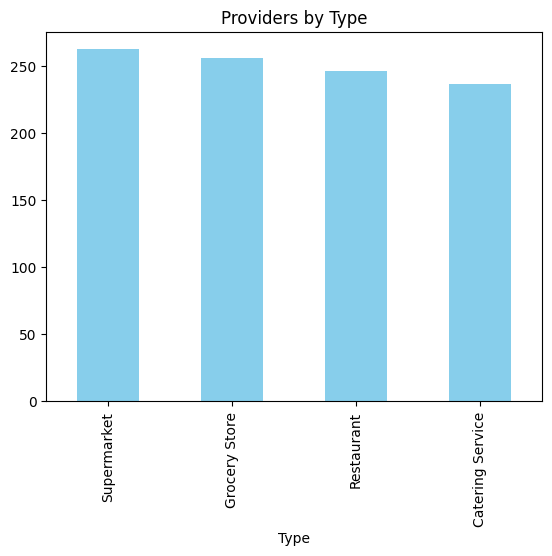

In [8]:
#Provider Distribution by Type
providers['Type'].value_counts()
providers['Type'].value_counts().plot(kind='bar', color='skyblue', title='Providers by Type')


<Axes: title={'center': 'Receivers by Type'}, xlabel='Type'>

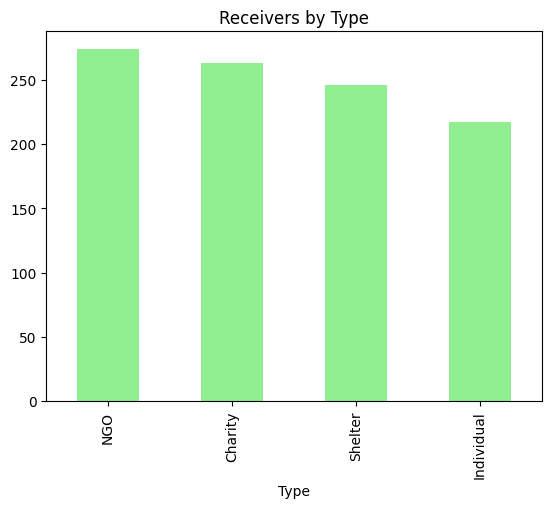

In [9]:
#Types of receivers in out dataset
receivers['Type'].value_counts()
receivers['Type'].value_counts().plot(kind='bar', color='lightgreen', title='Receivers by Type')


<Axes: title={'center': 'Top 10 Food Items Donated'}, xlabel='Food_Name'>

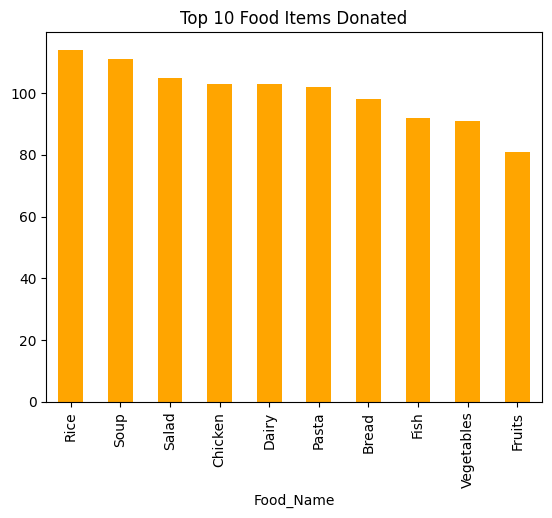

In [10]:
#Food Distribution.it will show top 10 distributed food items
food_listings['Food_Name'].value_counts().head(10)
food_listings['Food_Name'].value_counts().head(10).plot(kind='bar', color='orange', title='Top 10 Food Items Donated')


<Axes: title={'center': 'Claim Status Distribution'}, ylabel='count'>

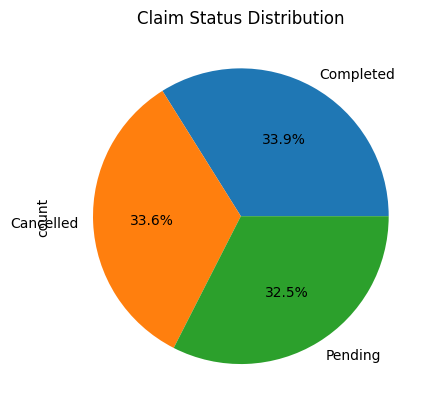

In [11]:
claims['Status'].value_counts()
claims['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Claim Status Distribution')


In [12]:
claims['Timestamp'] = pd.to_datetime(claims['Timestamp'])
merged_claims = claims.merge(food_listings, on='Food_ID').merge(providers, on='Provider_ID')
pd.crosstab(merged_claims['Type'], merged_claims['Status'])


Status,Cancelled,Completed,Pending
Type,,,
Catering Service,86,80,78
Grocery Store,84,88,75
Restaurant,88,89,80
Supermarket,78,82,92


In [13]:
merged_claims_receivers = claims.merge(receivers, on='Receiver_ID')
pd.crosstab(merged_claims_receivers['Type'], merged_claims_receivers['Status'])


Status,Cancelled,Completed,Pending
Type,,,
Charity,84,96,88
Individual,82,72,76
NGO,99,92,81
Shelter,71,79,80


In [14]:
pd.crosstab(merged_claims['Food_Type'], merged_claims['Status'])


Status,Cancelled,Completed,Pending
Food_Type,,,
Non-Vegetarian,112,114,105
Vegan,111,98,110
Vegetarian,113,127,110


<Axes: xlabel='Timestamp'>

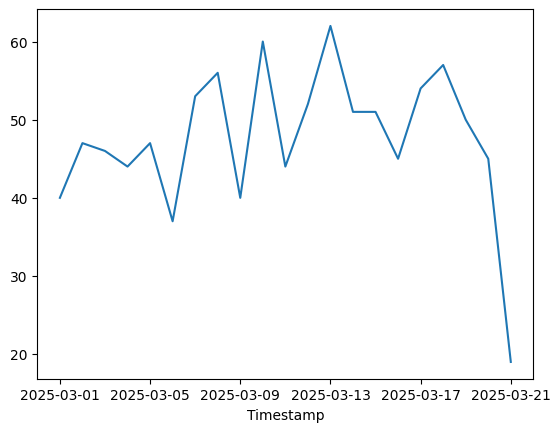

In [15]:
claims['Timestamp'] = pd.to_datetime(claims['Timestamp'])
claims['Timestamp'].dt.date.value_counts().sort_index().plot(kind='line')


In [16]:
food_listings['Expiry_Date'] = pd.to_datetime(food_listings['Expiry_Date'])
expiring_soon = food_listings[food_listings['Expiry_Date'] <= pd.Timestamp.today() + pd.Timedelta(days=7)]


<Axes: title={'center': 'Top 10 Providers by Claims'}, ylabel='Name'>

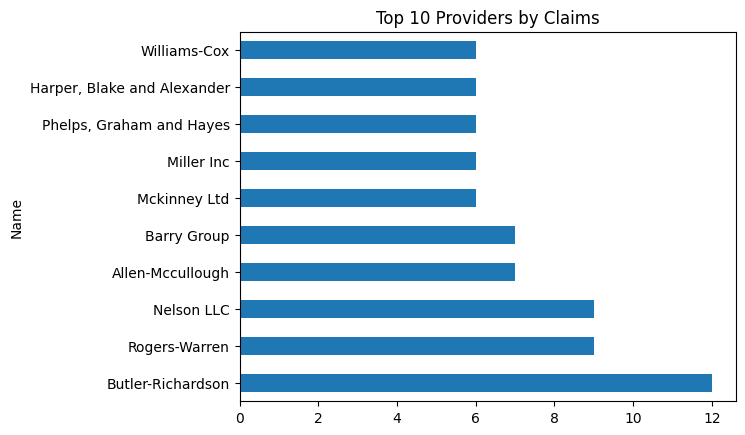

In [17]:
top_providers = merged_claims['Name'].value_counts().head(10)
top_providers.plot(kind='barh', title="Top 10 Providers by Claims")


<Axes: title={'center': 'Weekly Claim Trend'}, xlabel='Timestamp'>

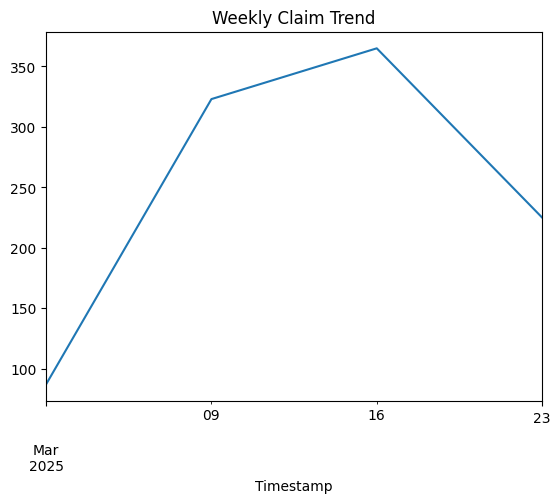

In [18]:
claims.set_index('Timestamp').resample('W').size().plot(kind='line', title="Weekly Claim Trend")


In [19]:
unclaimed = food_listings[~food_listings['Food_ID'].isin(claims['Food_ID'])]

Index(['Claim_ID', 'Food_ID', 'Receiver_ID', 'Status', 'Timestamp',
       'Food_Name', 'Quantity', 'Expiry_Date', 'Provider_ID', 'Provider_Type',
       'Location', 'Food_Type', 'Meal_Type', 'Name', 'Type', 'Address', 'City',
       'Contact'],
      dtype='object')


<Axes: xlabel='Type'>

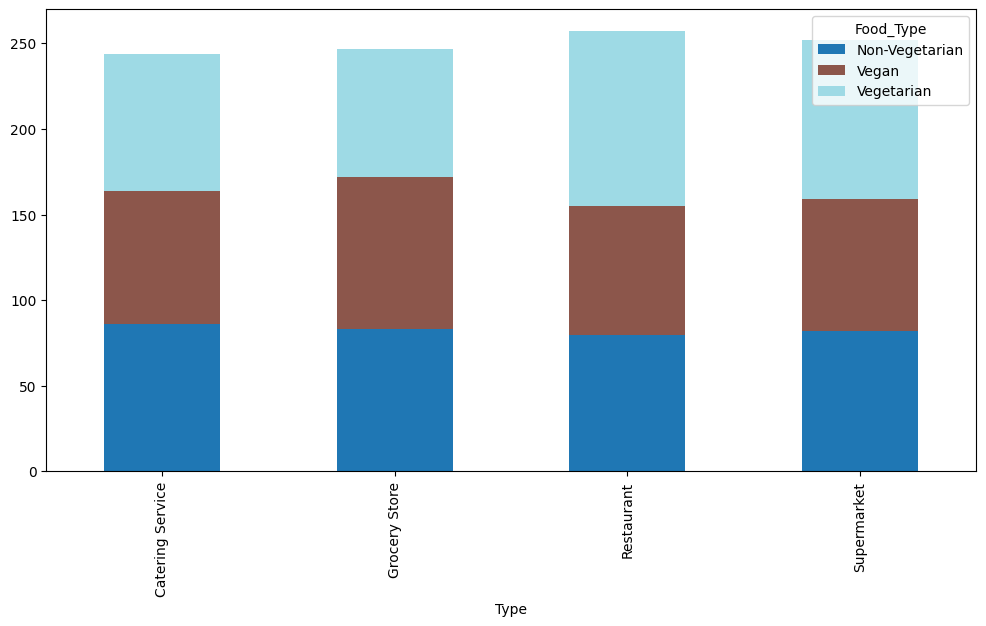

In [20]:
print(merged_claims.columns)

merged_claims.groupby(['Type','Food_Type']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(12,6), colormap='tab20')



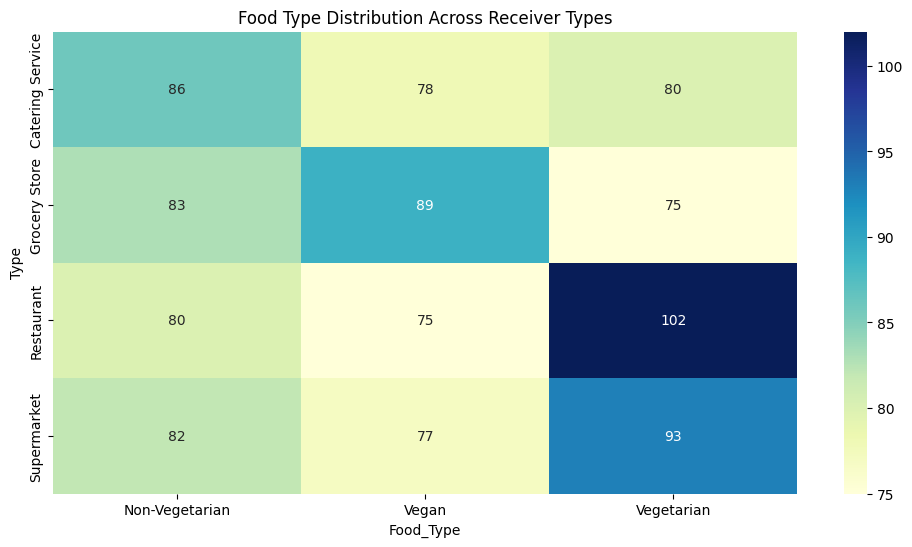

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = merged_claims.pivot_table(
    index='Type', columns='Food_Type', values='Claim_ID', aggfunc='count', fill_value=0
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Food Type Distribution Across Receiver Types")
plt.show()


<Axes: xlabel='Type'>

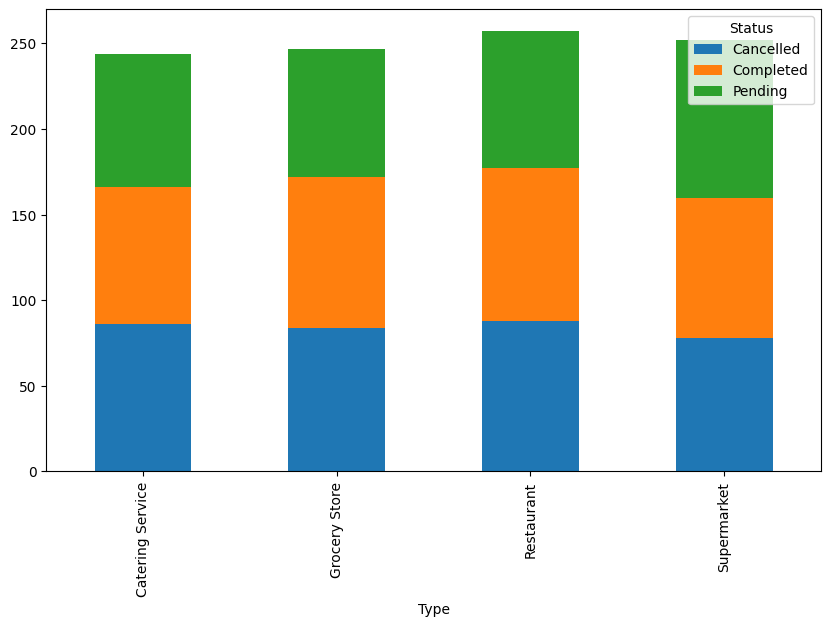

In [22]:
merged_claims.groupby(['Type','Status']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(10,6))


/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


<Axes: xlabel='Timestamp'>

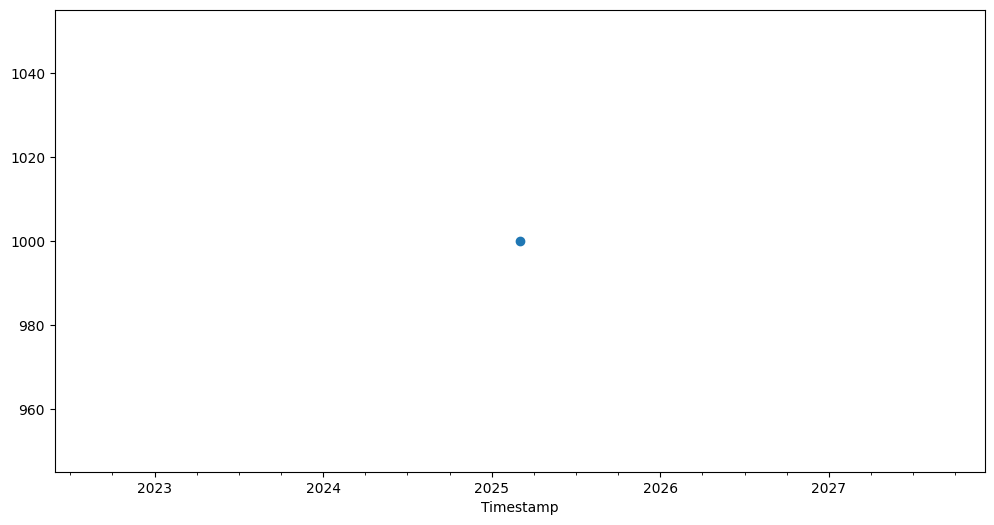

In [23]:

merged_claims['Timestamp'] = pd.to_datetime(merged_claims['Timestamp'])
merged_claims.groupby(merged_claims['Timestamp'].dt.to_period("M"))['Claim_ID'].count().plot(
    kind='line', marker='o', figsize=(12,6))


In [24]:
print(merged_claims['Timestamp'].head(10))
print(merged_claims['Timestamp'].min(), merged_claims['Timestamp'].max())

#we tried to retrieve data based on montly n i came to know we only have one month data to confirm i wrote this code to confirm

0   2025-03-05 05:26:00
1   2025-03-11 10:24:00
2   2025-03-21 00:59:00
3   2025-03-04 09:08:00
4   2025-03-14 15:17:00
5   2025-03-02 02:50:00
6   2025-03-07 23:58:00
7   2025-03-05 07:07:00
8   2025-03-18 02:26:00
9   2025-03-06 19:57:00
Name: Timestamp, dtype: datetime64[ns]
2025-03-01 00:09:00 2025-03-21 06:12:00


<Axes: xlabel='Timestamp'>

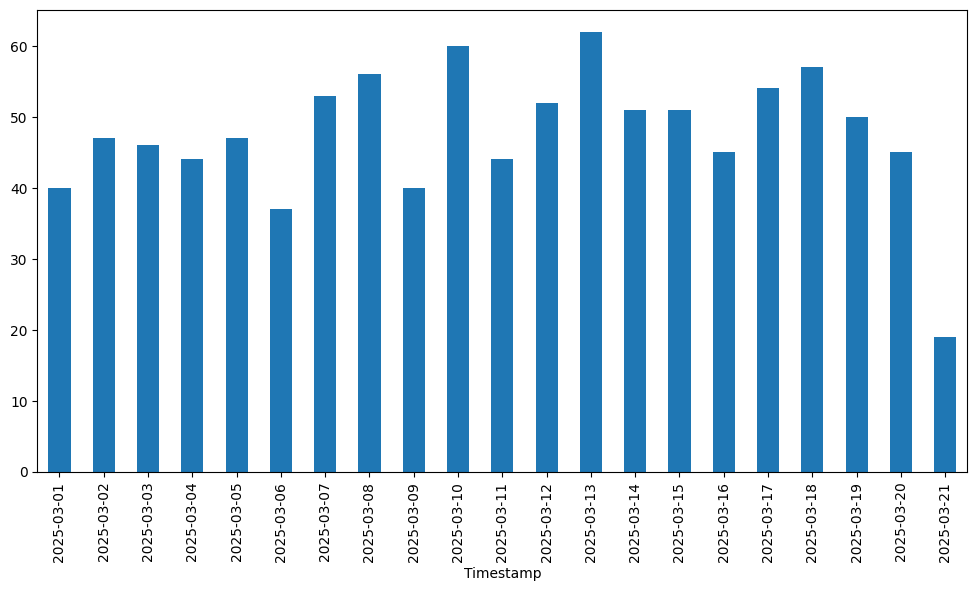

In [25]:

 merged_claims.groupby(merged_claims['Timestamp'].dt.date)['Claim_ID'].count().plot(
    kind='bar', figsize=(12,6))



<Axes: title={'center': 'Top Providers by Quantity'}, xlabel='Provider_ID'>

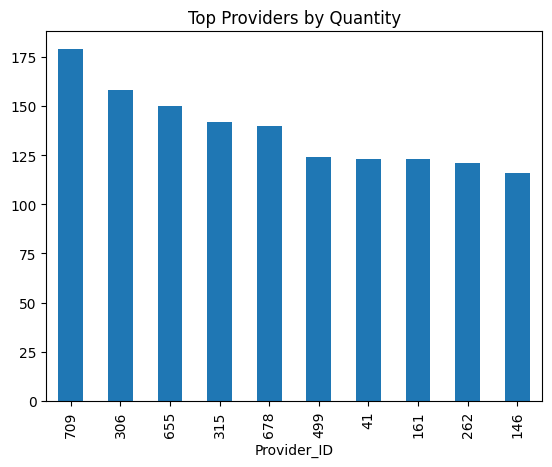

In [26]:
top_providers = food_listings.groupby('Provider_ID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_providers
top_providers = food_listings.groupby('Provider_ID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_providers.plot(kind='bar', title='Top Providers by Quantity')



<Axes: title={'center': 'Top Receivers by Number of Claims'}, xlabel='Receiver_ID'>

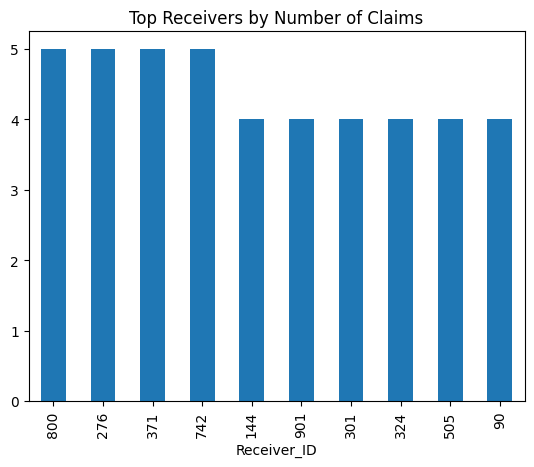

In [27]:
claims_with_receivers = claims.merge(receivers, on='Receiver_ID')
claims_with_receivers['City'].value_counts().head(10)
claims['Receiver_ID'].value_counts().head(10).plot(kind='bar', title='Top Receivers by Number of Claims')


<Axes: title={'center': 'Food Type vs Claim Status'}, xlabel='Food_Type'>

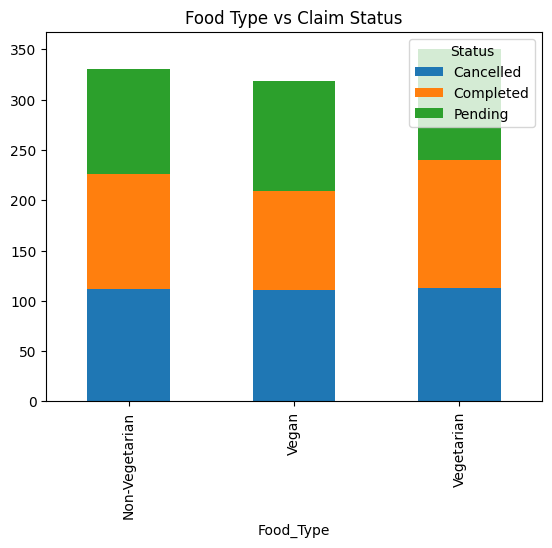

In [28]:
merged_claims.groupby(['Food_Type','Status']).size().unstack(fill_value=0)

merged_claims.groupby(['Food_Type','Status']).size().unstack(fill_value=0).plot(kind='bar', stacked=True, title='Food Type vs Claim Status')


<Axes: title={'center': 'Average Donation Size by Provider Type'}, xlabel='Provider_Type'>

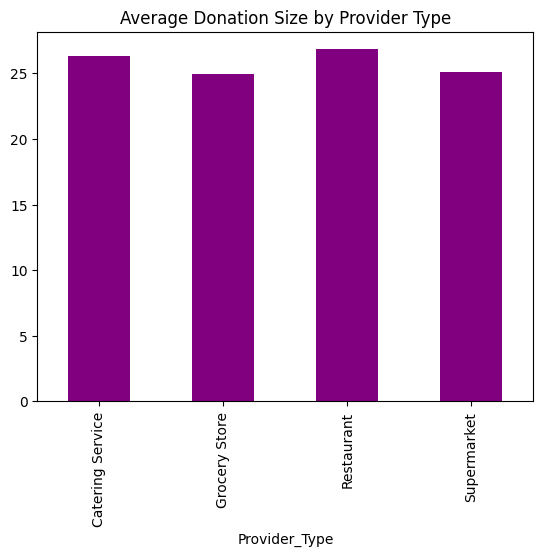

In [29]:
avg_donation = food_listings.groupby('Provider_Type')['Quantity'].mean()
avg_donation
avg_donation = food_listings.groupby('Provider_Type')['Quantity'].mean()
avg_donation.plot(kind='bar', color='purple', title='Average Donation Size by Provider Type')


<Axes: title={'center': 'Top Cities by Cancelled Claims'}, xlabel='City'>

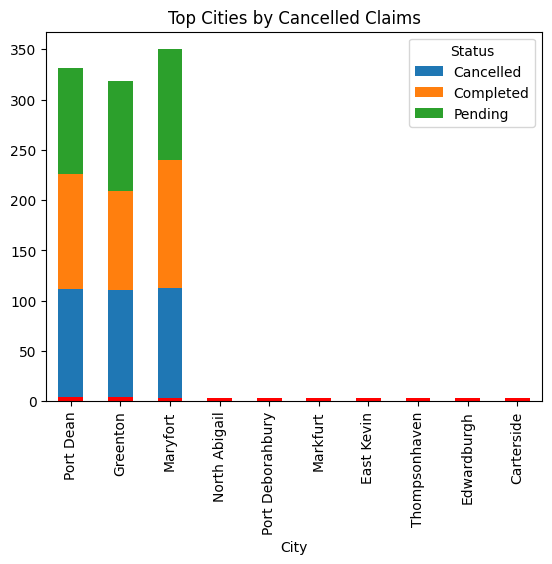

In [30]:
cancelled = claims_with_receivers[claims_with_receivers['Status'] == 'Cancelled']
cancelled['City'].value_counts().head(10)
merged_claims.groupby(['Food_Type','Status']).size().unstack(fill_value=0).plot(kind='bar', stacked=True, title='Food Type vs Claim Status')
cancelled = claims_with_receivers[claims_with_receivers['Status'] == 'Cancelled']
cancelled['City'].value_counts().head(10).plot(kind='bar', color='red', title='Top Cities by Cancelled Claims')


<Axes: title={'center': 'Most Popular Meal Types'}, xlabel='Meal_Type'>

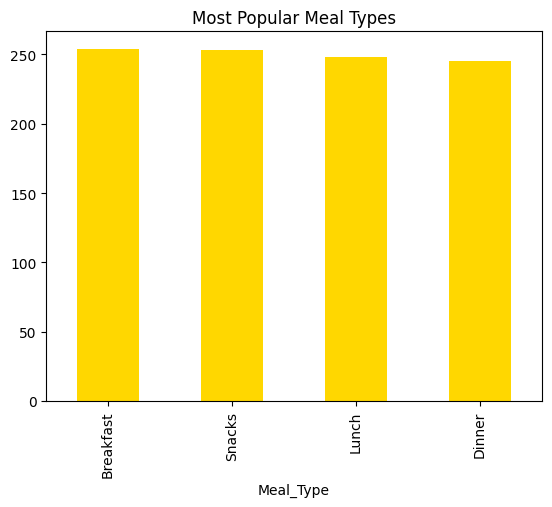

In [31]:
food_listings['Meal_Type'].value_counts()
food_listings['Meal_Type'].value_counts().plot(kind='bar', color='gold', title='Most Popular Meal Types')


<Axes: title={'center': 'Top Reliable Providers (Completion Rate)'}, xlabel='Provider_ID'>

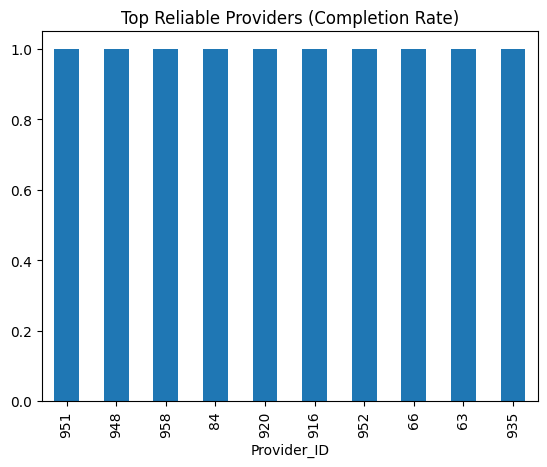

In [32]:
provider_claims = merged_claims.groupby('Provider_ID')['Status'].value_counts(normalize=True).unstack().fillna(0)
provider_claims.sort_values(by='Completed', ascending=False).head(10)
provider_claims = merged_claims.groupby('Provider_ID')['Status'].value_counts(normalize=True).unstack().fillna(0)
provider_claims['Completed'].sort_values(ascending=False).head(10).plot(kind='bar', title='Top Reliable Providers (Completion Rate)')


<Axes: title={'center': 'Completion Rate by Receiver Type'}, xlabel='Type'>

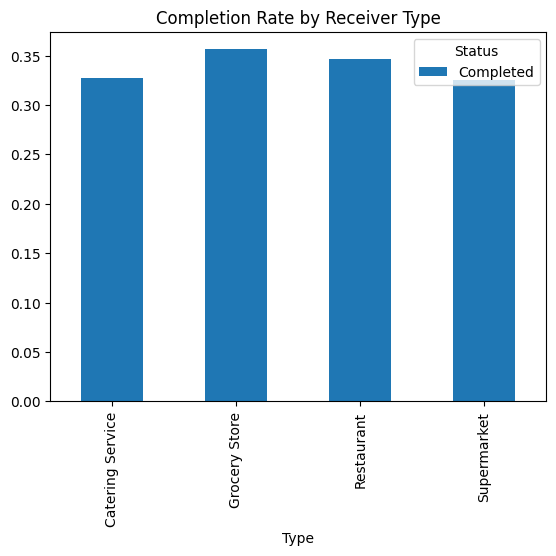

In [33]:
receiver_claims = merged_claims.groupby('Type')['Status'].value_counts(normalize=True).unstack().fillna(0)
receiver_claims
receiver_claims = merged_claims.groupby('Type')['Status'].value_counts(normalize=True).unstack().fillna(0)
receiver_claims[['Completed']].plot(kind='bar', title='Completion Rate by Receiver Type')


<Axes: title={'center': 'Expired Food Donations by Type'}, xlabel='Food_Type'>

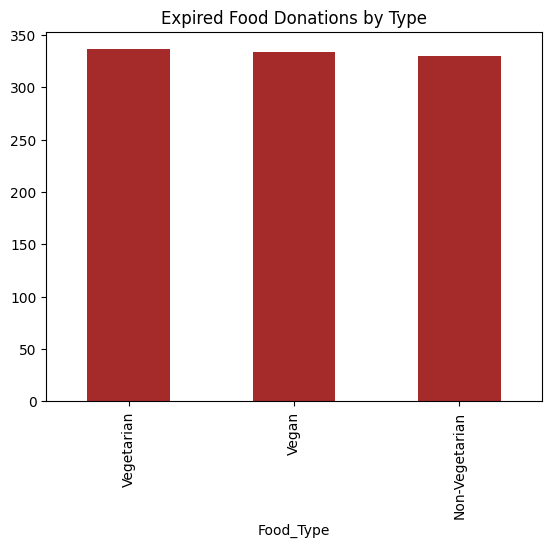

In [34]:
food_listings['Expiry_Date'] = pd.to_datetime(food_listings['Expiry_Date'])
expired = food_listings[food_listings['Expiry_Date'] < pd.Timestamp.today()]
len(expired)
food_listings['Expiry_Date'] = pd.to_datetime(food_listings['Expiry_Date'])
expired = food_listings[food_listings['Expiry_Date'] < pd.Timestamp.today()]
expired['Food_Type'].value_counts().plot(kind='bar', color='brown', title='Expired Food Donations by Type')


/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


<Axes: title={'center': 'Claims per Month'}, xlabel='Month'>

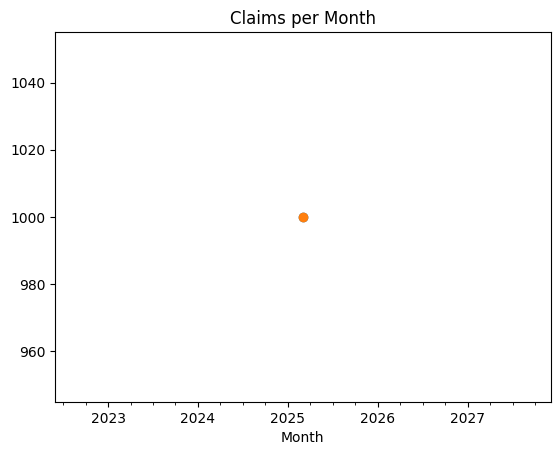

In [35]:
claims['Timestamp'] = pd.to_datetime(claims['Timestamp'])
claims['Month'] = claims['Timestamp'].dt.to_period('M')
monthly_trend = claims.groupby('Month').size()
monthly_trend.plot(kind='line', marker='o', title='Claims per Month')
claims['Timestamp'] = pd.to_datetime(claims['Timestamp'])
claims['Month'] = claims['Timestamp'].dt.to_period('M')
monthly_trend = claims.groupby('Month').size()
monthly_trend.plot(kind='line', marker='o', title='Claims per Month')


Food wastage distribution by Food Type:

Food_Type
Vegan             3128
Vegetarian        2988
Non-Vegetarian    2825
Name: Quantity, dtype: int64

Food wastage distribution by Provider Type:

Provider_Type
Catering Service    2446
Restaurant          2440
Grocery Store       2205
Supermarket         1850
Name: Quantity, dtype: int64


<Axes: title={'center': 'Food Wastage by Provider Type'}, xlabel='Provider_Type'>

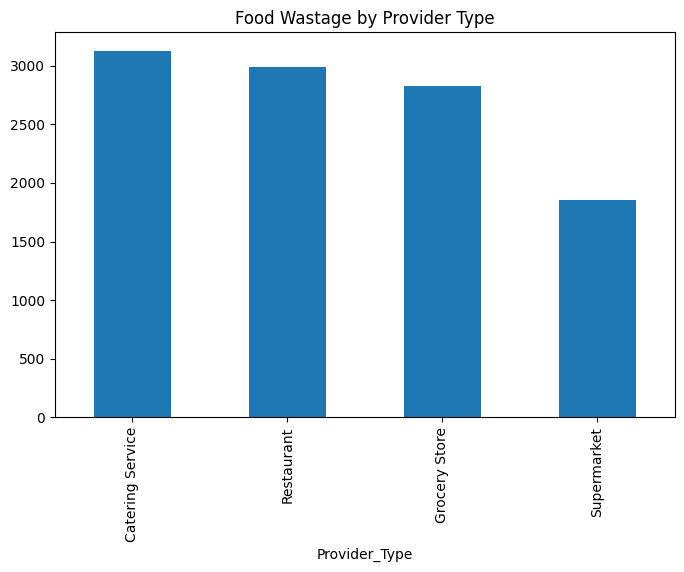

In [36]:
# Merge claims with food listings to check wastage
wastage = merged_claims[merged_claims['Status'] == 'Cancelled']

# Group by Food Type to see which food categories are wasted the most
wastage_by_food = wastage.groupby('Food_Type')['Quantity'].sum().sort_values(ascending=False)

print("Food wastage distribution by Food Type:\n")
print(wastage_by_food)

# Plot wastage by Food Type
wastage_by_food.plot(kind='bar', figsize=(8,5), title='Food Wastage by Food Type')

# Group by Provider Type to see which providers waste the most
wastage_by_provider = wastage.groupby('Provider_Type')['Quantity'].sum().sort_values(ascending=False)

print("\nFood wastage distribution by Provider Type:\n")
print(wastage_by_provider)

# Plot wastage by Provider Type
wastage_by_provider.plot(kind='bar', figsize=(8,5), title='Food Wastage by Provider Type')



City
East Heatherport       193
Lesterstad             150
Maysside               117
Jamesfurt              102
New Rachel              98
South Justinborough     96
Brownshire              92
Brittanyside            92
East Roberthaven        92
West Whitneymouth       91
Name: Quantity, dtype: int64


<Axes: title={'center': 'Top 10 Cities with Highest Food Wastage'}, xlabel='City'>

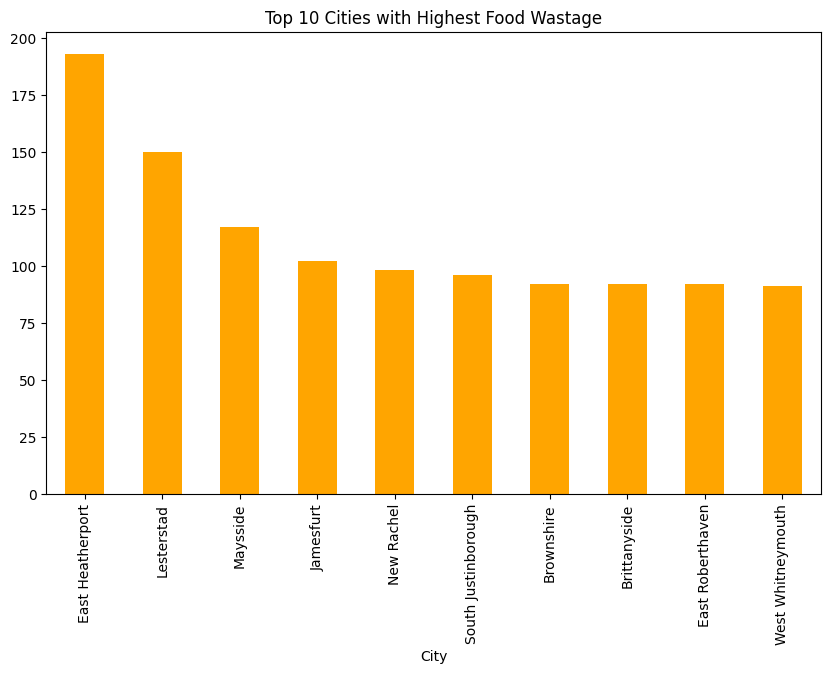

In [37]:
# Wastage by City
wastage_by_city = wastage.groupby('City')['Quantity'].sum().sort_values(ascending=False).head(10)
print(wastage_by_city)

# Plot
wastage_by_city.plot(
    kind='bar',
    color='orange',
    figsize=(10,6),
    title='Top 10 Cities with Highest Food Wastage'
)
